# Explore here

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [202]:
#Load Data and perform a quick check
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
440,31,female,32.680,1,no,northwest,4738.26820
960,19,female,39.615,1,no,northwest,2730.10785
589,38,female,30.690,1,no,southeast,5976.83110
498,44,female,23.980,2,no,southeast,8211.10020
460,49,female,36.630,3,no,southeast,10381.47870
999,36,female,26.885,0,no,northwest,5267.81815
308,58,male,34.865,0,no,northeast,11944.59435
25,59,female,27.720,3,no,southeast,14001.13380
324,29,male,27.200,0,no,southwest,2866.09100
792,22,female,23.180,0,no,northeast,2731.91220


In [203]:
#Save the raw data
df_raw.to_csv('../data/raw/data_raw.csv')

In [205]:
#Time to process the Data
df_processed = df_raw.copy()

In [206]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [207]:
df_processed['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [208]:
df_processed['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [209]:
df_processed['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [210]:
df_processed['sex'] = df_processed['sex'].apply(lambda x: 1 if x == 'male' else 0)

df_processed.sample(5)

,age,sex,bmi,children,smoker,region,charges
802,21,1,22.30,1,no,southwest,2103.0800
148,53,0,37.43,1,no,northwest,10959.6947
969,39,0,34.32,5,no,southeast,8596.8278
977,26,1,29.15,1,no,southeast,2902.9065
1122,53,0,36.86,3,yes,northwest,46661.4424


In [211]:
df_processed['smoker'] = df_processed['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

df_processed.sample(5)

,age,sex,bmi,children,smoker,region,charges
137,22,1,25.175,0,0,northwest,2045.68525
363,21,0,26.400,1,0,southwest,2597.77900
498,44,0,23.980,2,0,southeast,8211.10020
706,51,0,38.060,0,1,southeast,44400.40640
621,37,1,34.100,4,1,southwest,40182.24600


In [212]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [213]:
df_processed.corr(numeric_only=True)

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [214]:
df_processed = df_processed.drop(['region'],axis=1)

In [215]:
df_processed.to_csv('../data/processed/data_processed.csv')

In [216]:
X = df_processed.drop(['charges'],axis=1).copy()

y = df_processed['charges'].copy()

In [217]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


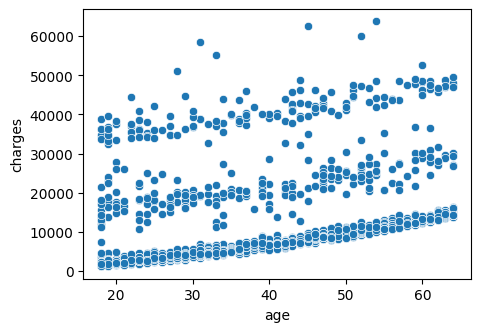

In [218]:
fig, axis = plt.subplots(figsize = (5, 3.5))
sns.scatterplot(data = df_processed, x = "age", y = "charges")

plt.show()

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


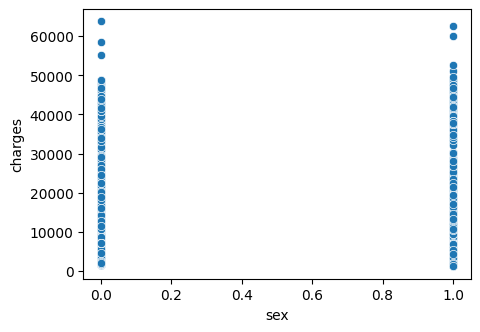

In [219]:
fig, axis = plt.subplots(figsize = (5, 3.5))
sns.scatterplot(data = df_processed, x = "sex", y = "charges")

plt.show()

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


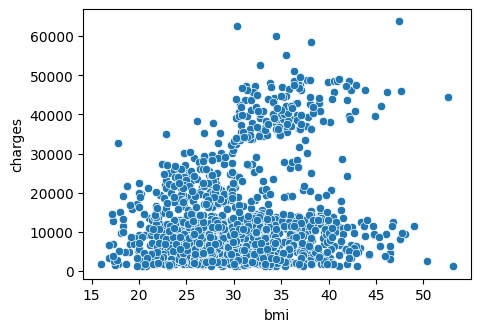

In [220]:
fig, axis = plt.subplots(figsize = (5, 3.5))
sns.scatterplot(data = df_processed, x = "bmi", y = "charges")

plt.show()

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


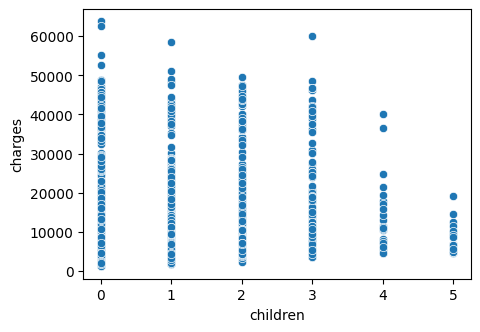

In [221]:
fig, axis = plt.subplots(figsize = (5, 3.5))
sns.scatterplot(data = df_processed, x = "children", y = "charges")

plt.show()

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


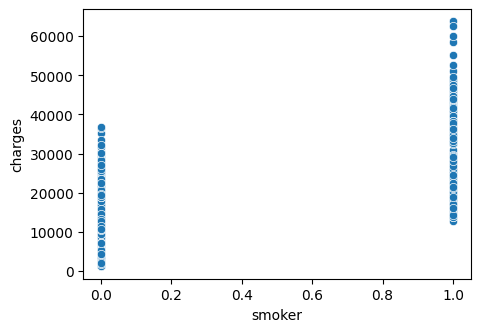

In [222]:
fig, axis = plt.subplots(figsize = (5, 3.5))
sns.scatterplot(data = df_processed, x = "smoker", y = "charges")

plt.show()

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1150, test_size=0.2)

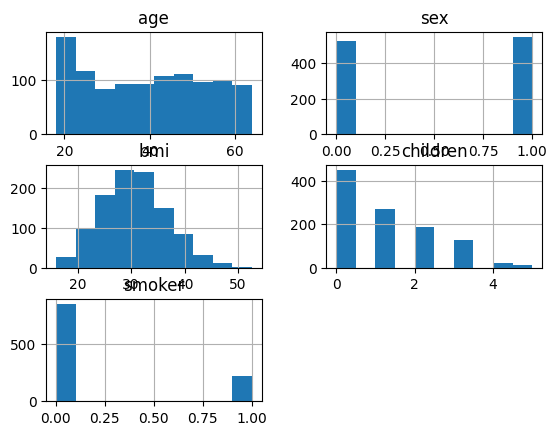

In [224]:
X_train.hist()
plt.show()

In [225]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [226]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [227]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 13307.602582270094
Coefficients (b): [3612.69169572  -59.56884076 2046.30797735  462.53266056 9555.45193573]


In [228]:
y_hat = model.predict(X_test_scaled)
y_hat

array([ 1.11400638e+04,  1.10452539e+04,  1.51887352e+04,  2.87478556e+04,
        4.90330990e+03,  9.89582697e+03,  4.34680365e+03,  1.10158567e+04,
        4.28423669e+03,  3.37098563e+03,  1.11254097e+04,  1.08516521e+04,
        3.92032164e+04,  2.63156847e+04,  2.56708890e+04,  9.30118146e+03,
        9.99743520e+03,  3.57171833e+03,  1.27165283e+04,  1.00988780e+04,
        1.52238247e+04,  1.42791588e+04,  7.87821536e+03,  1.36637158e+04,
        1.13033357e+04,  1.14467278e+04,  3.30789485e+01,  1.81062700e+04,
        3.59968536e+03,  2.79222107e+03,  9.89168634e+03,  2.70340987e+04,
        8.38237330e+03,  6.10262223e+03,  1.34805811e+04,  4.39007057e+03,
        7.84670966e+03,  3.90616691e+03,  5.96140670e+03,  1.52952153e+03,
        1.16874061e+03,  2.96501278e+04,  1.02043290e+04,  1.47684077e+04,
        1.16011438e+04,  1.14151011e+04,  1.21835594e+04,  9.24156690e+03,
        2.64384740e+04,  3.03098763e+04,  8.17884773e+03,  9.43694629e+02,
        1.74449927e+04,  

In [229]:
print(f"Mean squared error: {mean_squared_error(y_test, y_hat):.4f}")
print(f"Coefficient of determination: {r2_score(y_test, y_hat):.4f}")

Mean squared error: 35960464.2038
Coefficient of determination: 0.7559
